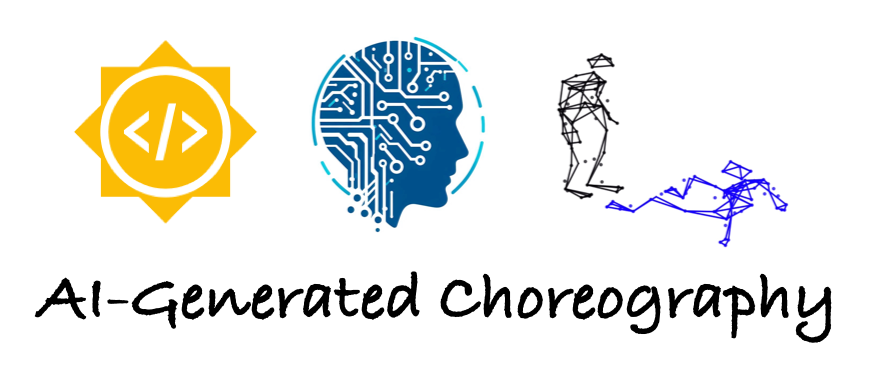
# Test Demo for Google Summer of Code 2024: [AI-Generated Choreography - from Solos to Duets](https://summerofcode.withgoogle.com/programs/2024/projects/PEvVr15z)



## Download related functions, trained model, and test dataset from GitHub

In [ ]:
!wget https://raw.githubusercontent.com/wang-zixuan/ChoreoAI/refs/heads/main/ChoreoAI_Zixuan_Wang/test_functions_for_colab_demo.py
!wget https://raw.githubusercontent.com/wang-zixuan/ChoreoAI/main/ChoreoAI_Zixuan_Wang/model_weights/best_model_fea_64_head_8_latent_64_units_64_seq_len_64_prob_0.1_velo_0.05_kl_5e-05_mse_0.5_frames_1.pth

!wget https://raw.githubusercontent.com/wang-zixuan/ChoreoAI/main/ChoreoAI_Zixuan_Wang/dataset/test_dataset_ilya_hannah.npy

--2025-01-08 22:45:43--  https://raw.githubusercontent.com/wang-zixuan/ChoreoAI/refs/heads/main/ChoreoAI_Zixuan_Wang/test_functions_for_colab_demo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21928 (21K) [text/plain]
Saving to: ‘test_functions_for_colab_demo.py’

test_functions_for_ 100%[===================>]  21.41K  --.-KB/s    in 0.001s  

2025-01-08 22:45:43 (14.4 MB/s) - ‘test_functions_for_colab_demo.py’ saved [21928/21928]

--2025-01-08 22:45:44--  https://raw.githubusercontent.com/wang-zixuan/ChoreoAI/main/ChoreoAI_Zixuan_Wang/model_weights/best_model_fea_64_head_8_latent_64_units_64_seq_len_64_prob_0.1_velo_0.05_kl_5e-05_mse_0.5_frames_1.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 18

## Instantiate model, load weights from trained model

In [ ]:
import torch

torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# test configuration
linear_num_features = 64
n_head = 8
latent_dim = 64
n_units = 64
seq_len = 64
no_input_prob = 0.1
velocity_loss_weight = 0.05
kl_loss_weight = 0.00005
mse_loss_weight = 0.5
frames = 1

In [ ]:
from test_functions_for_colab_demo import *

net = DancerTransformer(linear_num_features, n_head, latent_dim, n_units, seq_len, no_input_prob).to(device)
load_network(net, f"best_model_fea_{linear_num_features}_head_{n_head}_latent_{latent_dim}_units_{n_units}_seq_len_{seq_len}_prob_{no_input_prob}_velo_{velocity_loss_weight}_kl_{kl_loss_weight}_mse_{mse_loss_weight}_frames_{frames}.pth")

## Randomly choose data from test dataset and generate duet

In [ ]:
dataset_name = 'test_dataset_ilya_hannah'
test_dataset = create_test_dataset(dataset_name + '.npy')

test_set_idx = np.random.randint(0, len(test_dataset) - seq_len)

# feel free to change this two variables to generate sequence with different length
# if generate_d1 = True, we will generate Dancer #1 sequence conditioned on Dancer #2, and vice versa.
generate_d1 = True
generated_seq_len = 64

# generate duet
original, generated = generate_dancer_data(test_dataset, test_set_idx, seq_len, net, device, generated_seq_len, generate_d1=generate_d1)

In [ ]:
# blue: generated sequence; black: original sequence
combined_seq = np.concatenate((original, generated), axis=0)

min_coords = np.amin(combined_seq, axis=(0, 1))
max_coords = np.amax(combined_seq, axis=(0, 1))

ani = animate_stick(
    original,
    ghost=generated,
    figsize=(8, 6),
    speed=100,
    cmap='inferno',
    cloud=False,
    ax_lims=(min_coords[0], max_coords[0]),
    ay_lims=(min_coords[1], max_coords[1]),
    az_lims=(min_coords[2], max_coords[2]),
    dpi=80
)

display(HTML(ani.to_jshtml()))

Skeleton lines: 100%|██████████| 26/26 [00:00<00:00, 1100.17it/s]
